In [ ]:
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [74]:
num_locations=10
locations=[(random.randint(0, 100),random.randint(0, 100)) for i in range(num_locations)]
depot=(50,50)
num_vehicles=4

In [75]:
locations

[(76, 91),
 (83, 55),
 (51, 43),
 (10, 100),
 (50, 40),
 (46, 5),
 (18, 82),
 (10, 56),
 (94, 92),
 (64, 4)]

In [76]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [77]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [78]:
def calculate_distance(l1,l2):
    return ((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)**0.5

In [79]:
def evalVRP(individual):
    total_distance = 0
    distances = []
    current_location = depot
    routes = [[] for _ in range(num_vehicles)]
    for i, index in enumerate(individual):
        vehicle_index = i % num_vehicles
        routes[vehicle_index].append(index)

    for route in routes:
        if not route:
            continue
        route_distance = 0
        current_location = depot
        for index in route:
            route_distance += calculate_distance(current_location, locations[index])
            current_location = locations[index]

        route_distance += calculate_distance(current_location, depot)
        distances.append(route_distance)
        total_distance += route_distance

    if len(distances) > 1:
        std_dev = np.std(distances)
    else:
        std_dev = 0.0

    return total_distance, std_dev

In [80]:
toolbox.register("evaluate", evalVRP)

In [81]:
evalVRP(toolbox.individual())

(646.8918825747996, 70.97429444647554)

In [87]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [92]:
def plot_routes(individual, title="Routes"):
    plt.figure(figsize=(10, 8))
    plt.scatter(*depot, color='red', s=100, label='Depot')
    for i, (x, y) in enumerate(locations):
        plt.scatter(x, y, color='blue')
    routes = [[] for _ in range(num_vehicles)]
    for i, index in enumerate(individual):
        vehicle_index = i % num_vehicles
        routes[vehicle_index].append(index)
    for vehicle_index, route in enumerate(routes):
        if not route:
            continue
        current_location = depot
        for index in route:
            next_location = locations[index]
            plt.plot([current_location[0], next_location[0]], [current_location[1], next_location[1]], 'g-')
            current_location = next_location
        plt.plot([current_location[0], depot[0]], [current_location[1], depot[1]], 'g-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid()
    plt.show()

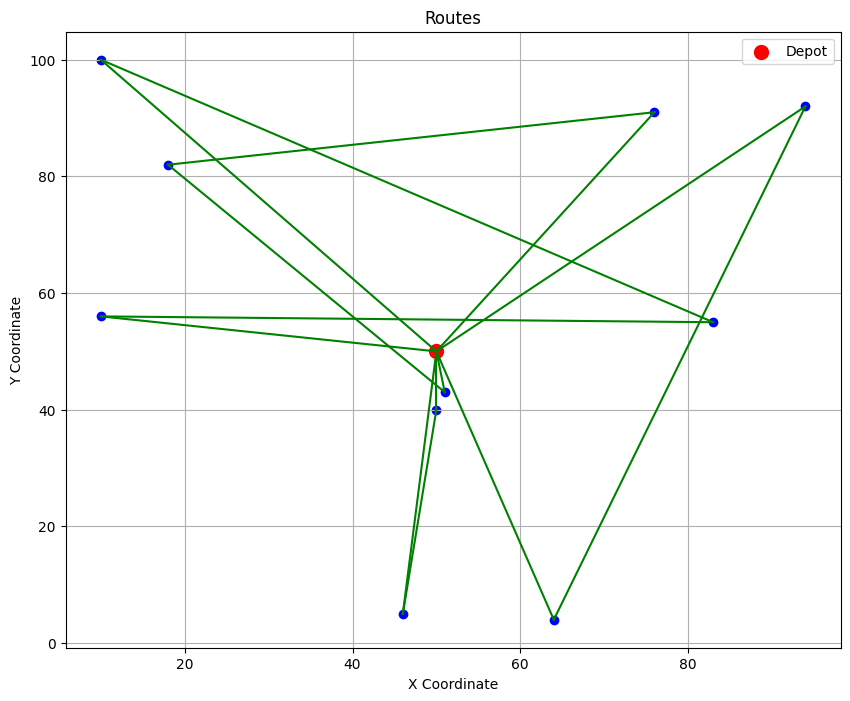

In [93]:
plot_routes(toolbox.individual())